# EDA

In [1]:
#path_plot = '/home/petra42/GIT/aida_question_classification/plots/'
path_plot = '/home/an/aida_question_classification/plots/'

## Libaries

In [2]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/an/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/an/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# data
path_class_def  = 'https://cogcomp.seas.upenn.edu/Data/QA/QC/definition.html'
path_train_data = 'https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label'
path_test_data  = 'https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label'

#Functions

In [4]:
# from folder data
# import data.get_data.process_question(row)
def process_question(row):
   '''join row to text''' 
   return " ".join(row.split(" ")[1:])

In [5]:
def get_plot_length_text(df, title, diagram):
    '''
    creates a histogram 
    that shows the distribution of the number of tokens 
    per line for the data set to be examined
    
    Parameters
    ----------
    df:
        series; to examined text
    title: 
        string; title for Plot
    diagram: 
        string: name of the diagram
    
    Returns
    -------
    Vizualisationplot Distribution
    '''
    plt.hist(df.apply(lambda text: len(text.split())))
    plt.xlabel('number of token')
    plt.ylabel('frequency')
    plt.title(title)
    plt.savefig(path_plot + diagram + '.png')
    plt.show()
    
    avg = round(df.apply(lambda text: len(text.split())).mean())
    maxi = max(list(df.apply(lambda text: len(text.split()))))
    mini = min(list(df.apply(lambda text: len(text.split()))))
    
    print(f'The texts have a mean length of {avg} tokens.')
    print(f'The longest text has {maxi} tokens, the shortest has {mini} tokens.')

In [6]:
def find_duplicates(df, column):
    '''
    Find duplicates and drop by 100% match
    
    Parameters
    ----------
    df; name of the DataFrame
    column; to column to be examined 
    
    Returns
    -------
    series; to check whether duplicates present
        df; clean df only duplicates
    '''
    duplicat = list(df[column].duplicated())
    print (set(duplicat))
    
    count_dups = df.pivot_table(index=['raw'], aggfunc='size')
    nb = len(df[column])-len(count_dups)
    print(f'The column has {nb} duplicates.')

def clean_duplicates(df):
    '''remove duplicates'''
    df = df.drop_duplicates(inplace=True)
    return df

In [7]:
def corpus_func(df):
    '''
    create a textcorpus from pd.series, df['column']

    Parameters
    ----------
    text, string

    Returns
    ------_
    concatinated string with marker ##### as selector
    '''
    return "######".join(text for text in df)

def split_corpus_func(corpus):
    '''
    create a column from text corpus with marker '#####'
    as selector

    Parameters
    ----------
    text, string

    Returns
    ------_
    list of text 
    '''
    list = lambda x: x.split('######')
    return list

def preprocess_dataframe(df):
    '''
    create new columns in the data frame
    new_column: 'text' => cleaned stopwords (english)
                'text_clean' => regex, lowercase
                'text_lemma' => lemmetized
    param: df
    returns: df with new columns
    '''

    corpus = corpus_func(df['question'])
    text_corpus = stopword_text(corpus)
    df['text'] = split_corpus_func(corpus)
    clean_corpus = clean_text(text_corpus)
    df['text_clean'] = split_corpus_func(clean_corpus)
    lemma = lem_text(clean_corpus)
    df['text_lemma'] = split_corpus_func(clean_corpus)
    return df


In [8]:
#import utils.text_manipulation

def clean_text(text):
    """
    Regex cleaning of the text. Filters everything except alphanumerical and '.
    Return is turned into lower case

    Parameters
    ----------
    text : string
        text to be cleaned

    Returns
    -------
    string
        lower case regex cleaned text

    """
    text = text.replace("´", "'")
    
    text = text.replace("'s", " ")

    digi_punct = "[^a-zA-Z.1234567890#' ]"
    text = re.sub(digi_punct, " ", text)
    text = " ".join(text.split())
    text = text.lower()
    return text



def stopword_text(text):
    """
    Remove all words in the text that are in the stopword list
     
    Parameters
    ----------
    text : string
    
    Returns
    -------
    string
        text only stopwords
     
    """

    return " ".join([word for word in text.split() if word not in my_stopwords])



def lem_text(text):
    """
    Group the different inflected forms of a word so they can be analysed as 
    a single item
     
    Parameters
    ----------
    text : string
    
    Returns
    -------
    string
        text with lemmas
    """

    lem_sentence = text.split()
    for i, word in enumerate(text.split()):
        for pos in "n", "v", "a", "r":
            lem = lemmatizer.lemmatize(word, pos=pos)
            if lem != word:
                lem_sentence[i] = lem
                break
            else:
                lem_sentence[i] = word
    return " ".join(lem_sentence)


# Load data

In [9]:
#load
train_df = pd.read_table(path_train_data, encoding = "ISO-8859-1", header=None)
train_df.columns = ["raw"]
train_df['category'] = train_df.apply (lambda row: row["raw"].split(":")[0], axis=1)
train_df['subcategory'] = train_df.apply (lambda row: row["raw"].split(" ")[0].split(":")[1], axis=1)
train_df['question'] = train_df.apply (lambda row: process_question(row["raw"]), axis=1)

train_df

,raw,category,subcategory,question
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC:manner How can I find a list of celebriti...,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY:animal What fowl grabs the spotlight afte...,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR:exp What is the full form of .com ?,ABBR,exp,What is the full form of .com ?
...,...,...,...,...
5447,ENTY:other What 's the shape of a camel 's spi...,ENTY,other,What 's the shape of a camel 's spine ?
5448,ENTY:currency What type of currency is used in...,ENTY,currency,What type of currency is used in China ?
5449,NUM:temp What is the temperature today ?,NUM,temp,What is the temperature today ?
5450,NUM:temp What is the temperature for cooking ?,NUM,temp,What is the temperature for cooking ?


In [10]:
test_df = pd.read_table(path_test_data, encoding = "ISO-8859-1", header=None)
test_df.columns = ["raw"]
test_df['category'] = train_df.apply (lambda row: row["raw"].split(":")[0], axis=1)
test_df['subcategory'] = train_df.apply (lambda row: row["raw"].split(" ")[0].split(":")[1], axis=1)
test_df['question'] = train_df.apply (lambda row: process_question(row["raw"]), axis=1)

test_df

,raw,category,subcategory,question
0,NUM:dist How far is it from Denver to Aspen ?,DESC,manner,How did serfdom develop in and then leave Russ...
1,"LOC:city What county is Modesto , California in ?",ENTY,cremat,What films featured the character Popeye Doyle ?
2,HUM:desc Who was Galileo ?,DESC,manner,How can I find a list of celebrities ' real na...
3,DESC:def What is an atom ?,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,NUM:date When did Hawaii become a state ?,ABBR,exp,What is the full form of .com ?
...,...,...,...,...
495,HUM:ind Who was the 22nd President of the US ?,ENTY,cremat,What is the Jewish bible called ?
496,ENTY:currency What is the money they use in Za...,DESC,reason,Why is the grass green ?
497,NUM:count How many feet in a mile ?,DESC,def,What is a firewall ?
498,ENTY:substance What is the birthstone of Octob...,HUM,ind,What spy novelist served as Moscow corresponde...


In [11]:
train_df.head(5)

#describe
train_df.describe()
test_df.describe()

,raw,category,subcategory,question
count,500,500,500,500
unique,500,6,38,498
top,DESC:def What are coral reefs ?,DESC,ind,What is the speed of the Mississippi River ?
freq,1,113,84,3


#Explore
### question:
    - shape, - size
    - info: 
        count: row, unique categories, subcategories
    - witch catagories, subcategories, same in both dataframes
    - distribution
    - duplicates
    - len questions (count token)
    

 

In [12]:
# print test, train shape
print(f'---shapes---\ntrain:\t{train_df.shape}\ntest:\t{test_df.shape}')

---shapes---
train:	(5452, 4)
test:	(500, 4)


In [13]:
# number of row of columns
print(f'train_size:\t{train_df.size}\ntest_size:\t{test_df.size}') 

train_size:	21808
test_size:	2000


In [14]:
# line occupancy    
print(f'---train---:\n {train_df.nunique()}\n')
print(f'---test---:\n {test_df.nunique()}')

---train---:
 raw            5382
category          6
subcategory      47
question       5381
dtype: int64

---test---:
 raw            500
category         6
subcategory     38
question       498
dtype: int64


In [15]:
#which categories?
print(f"unique categories: {train_df['category'].unique()}")
#same categories in train and test?
train_df['category'].unique() == test_df['category'].unique()


unique categories: ['DESC' 'ENTY' 'ABBR' 'HUM' 'NUM' 'LOC']


array([ True,  True,  True,  True,  True,  True])

In [16]:
# load dictionary as dict
#which categories are not used?.
#which categories are used in train and test?

print(f"unique subcategories: {train_df['subcategory'].unique()}")





unique subcategories: ['manner' 'cremat' 'animal' 'exp' 'ind' 'gr' 'title' 'def' 'date' 'reason'
 'event' 'state' 'desc' 'count' 'other' 'letter' 'religion' 'food'
 'country' 'color' 'termeq' 'city' 'body' 'dismed' 'mount' 'money'
 'product' 'period' 'substance' 'sport' 'plant' 'techmeth' 'volsize'
 'instru' 'abb' 'speed' 'word' 'lang' 'perc' 'code' 'dist' 'temp' 'symbol'
 'ord' 'veh' 'weight' 'currency']


category
ABBR      86
DESC    1162
ENTY    1250
HUM     1223
LOC      835
NUM      896
Name: subcategory, dtype: int64


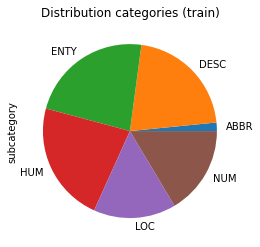

In [17]:
# distribution categories (train)
dist_train_cat = train_df.groupby('category')['subcategory'].count()
print(dist_train_cat)
dist_train_cat.sort_values(ascending=False)

#visualisation 
dist_train_cat.plot.pie()
plt.title('Distribution categories (train)')
plt.savefig(path_plot + 'Distribution_categories_train.png')
plt.show()

In [18]:
type(dist_train_cat)
dist_train_cat.values

array([  86, 1162, 1250, 1223,  835,  896])

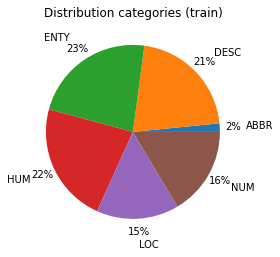

In [19]:
plt.pie(dist_train_cat,labels=dist_train_cat.index, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3) 
plt.title('Distribution categories (train)')
#plt.savefig(path_plot + 'Distribution_categories_train%.png')
plt.show()

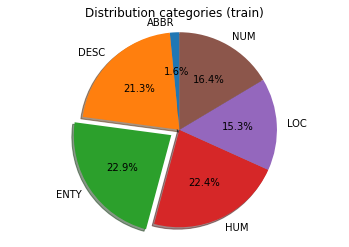

In [20]:
# Pie chart, where the slices will show the max_category:
labels=dist_train_cat.index
sizes = dist_train_cat
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 3nd slice (max_category)

fig1, ax1 = plt.subplots()
ax1.pie(dist_train_cat, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution categories (train)')
plt.savefig(path_plot + 'Distribution_categories_train_slice.png')
plt.show()

category
ABBR     11
DESC    113
ENTY    113
HUM     110
LOC      78
NUM      75
Name: subcategory, dtype: int64


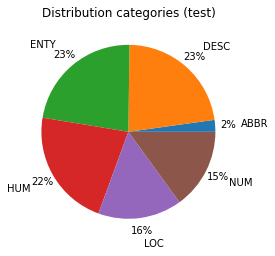

In [21]:
# distribution categories (test)
dist_test_cat = test_df.groupby('category')['subcategory'].count()
dist_test_cat.sort_values(ascending=False)
print(dist_test_cat)

plt.pie(dist_test_cat,labels=dist_test_cat.index, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3) 
plt.title('Distribution categories (test)')
plt.savefig(path_plot + 'Distribution_categories_test%.png')
plt.show()

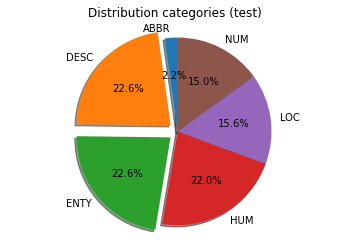

In [22]:
# Pie chart, where the slices will show the max_categories:
labels=dist_test_cat.index
explode = (0, 0.1, 0.1, 0, 0, 0)  # only "explode" the slice (max_categories)

fig1, ax1 = plt.subplots()
ax1.pie(dist_test_cat, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution categories (test)')
plt.savefig(path_plot + 'Distribution_categories_test_slice.png')
plt.show()

In [23]:
# distribution subcategories (train)
dist_train_sub = train_df.subcategory.groupby(train_df['category']).value_counts()
print(dist_train_sub)

category  subcategory
ABBR      exp             70
          abb             16
DESC      def            421
          manner         276
          desc           274
          reason         191
ENTY      other          217
          cremat         207
          animal         112
          dismed         103
          food           103
          termeq          93
          sport           62
          event           56
          product         42
          substance       41
          color           40
          techmeth        38
          veh             27
          word            26
          body            16
          lang            16
          plant           13
          symbol          11
          instru          10
          letter           9
          currency         4
          religion         4
HUM       ind            962
          gr             189
          desc            47
          title           25
LOC       other          464
          country    

In [24]:
#first 20 subcategories
print(f'first 20: {dist_train_sub.sort_values(ascending=False)[:20]}')

first 20: category  subcategory
HUM       ind            962
LOC       other          464
DESC      def            421
NUM       count          363
DESC      manner         276
          desc           274
NUM       date           218
ENTY      other          217
          cremat         207
DESC      reason         191
HUM       gr             189
LOC       country        155
          city           129
ENTY      animal         112
          dismed         103
          food           103
          termeq          93
NUM       period          75
          money           71
ABBR      exp             70
Name: subcategory, dtype: int64


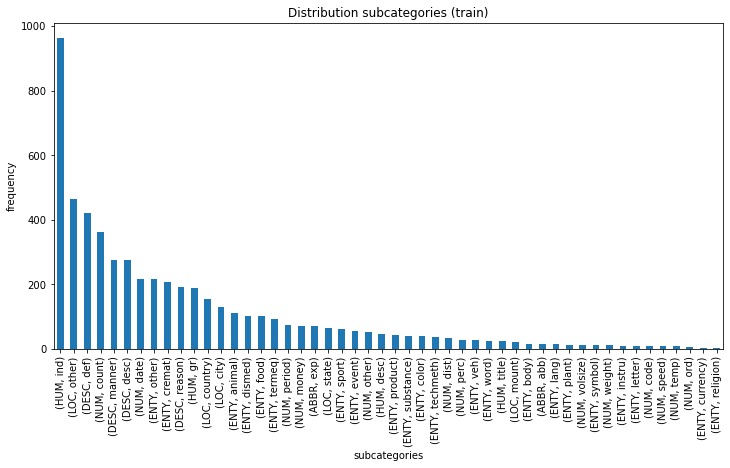

In [25]:
fig= plt.figure(figsize=(12,6))
dist_train_sub.sort_values(ascending=False).plot.bar(label='train')
plt.xlabel('subcategories')
plt.ylabel('frequency')
plt.title('Distribution subcategories (train)')
plt.savefig(path_plot + 'Distribution_subcategories_train.png')
plt.show()

In [26]:
# distribution subcategories (test)
dist_test_sub = test_df.subcategory.groupby(test_df['category']).value_counts()
print(dist_test_sub)


category  subcategory
ABBR      exp             9
          abb             2
DESC      def            40
          manner         29
          desc           23
          reason         21
ENTY      other          22
          cremat         21
          animal         16
          food            7
          termeq          7
          dismed          6
          techmeth        6
          body            5
          event           5
          color           3
          product         3
          sport           3
          instru          2
          substance       2
          lang            1
          letter          1
          plant           1
          religion        1
          word            1
HUM       ind            84
          gr             21
          desc            3
          title           2
LOC       other          41
          city           12
          country        12
          state           8
          mount           5
NUM       count          3

In [27]:
print(f'first 20: {dist_train_sub.sort_values(ascending=False)[:20]}')

first 20: category  subcategory
HUM       ind            962
LOC       other          464
DESC      def            421
NUM       count          363
DESC      manner         276
          desc           274
NUM       date           218
ENTY      other          217
          cremat         207
DESC      reason         191
HUM       gr             189
LOC       country        155
          city           129
ENTY      animal         112
          dismed         103
          food           103
          termeq          93
NUM       period          75
          money           71
ABBR      exp             70
Name: subcategory, dtype: int64


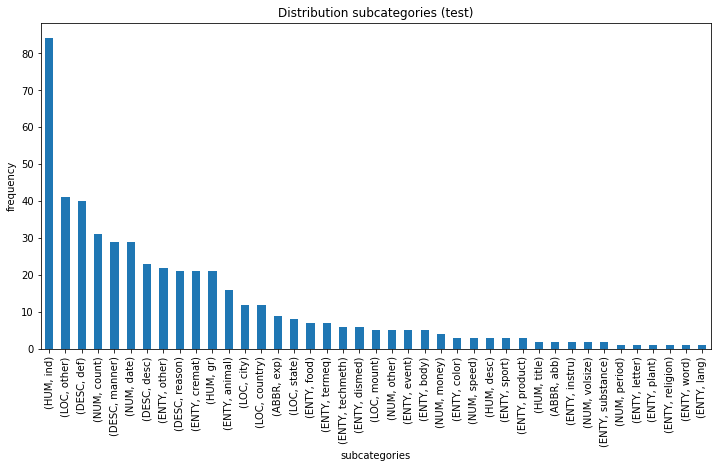

In [28]:
plt.figure(figsize=(12,6))
dist_test_sub.sort_values(ascending=False).plot.bar(label='test')
plt.xlabel('subcategories')
plt.ylabel('frequency')
plt.title('Distribution subcategories (test)')
plt.savefig(path_plot + 'Distribution_subcategories_test.png')
plt.show()

In [29]:
#plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

In [30]:
#test_df with only 38 subcategories compared to 47 in train_df
n = 14   #input for nlargest
train_df.subcategory.value_counts().nlargest(n).sum()

p = (train_df.subcategory.value_counts().nlargest(n).sum())/len(train_df)
print(f'The {n} largest subcategories account for a proportion of {p}')

The 14 largest subcategories account for a proportion of 0.8033749082905356


In [31]:
train_df.subcategory.value_counts().nlargest(n)

top_subcategories = list((train_df.subcategory.value_counts().nlargest(n)).index)
top_subcategories

train_df_top = train_df.loc[train_df['subcategory'].isin(top_subcategories)]
print(f'The {n} largest subcategories have {len(train_df_top)} questions.')

The 14 largest subcategories have 4380 questions.


In [32]:
train_df_top.sample(10)
train_df_top.subcategory.groupby(train_df['category']).value_counts()

#More than 80% of the data can be assigned to only 14 out of 47 subcategories in train_df

test_df.subcategory.value_counts().nlargest(39)

ind          84
other        68
def          40
count        31
manner       29
date         29
desc         26
cremat       21
reason       21
gr           21
animal       16
country      12
city         12
exp           9
state         8
termeq        7
food          7
dismed        6
techmeth      6
body          5
event         5
mount         5
money         4
color         3
speed         3
product       3
sport         3
title         2
instru        2
volsize       2
abb           2
substance     2
letter        1
religion      1
plant         1
period        1
lang          1
word          1
Name: subcategory, dtype: int64

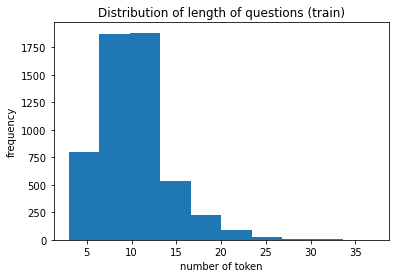

The texts have a mean length of 10 tokens.
The longest text has 37 tokens, the shortest has 3 tokens.


In [33]:
# distribution of length of questions, train data
df = train_df['question']
title = 'Distribution of length of questions (train)'
diagram ='length_questions_train'

get_plot_length_text(df, title, diagram)

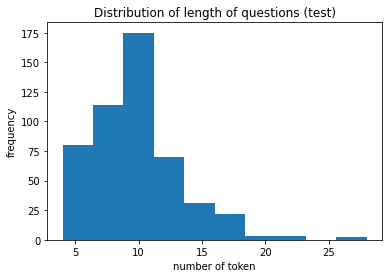

The texts have a mean length of 10 tokens.
The longest text has 28 tokens, the shortest has 4 tokens.


In [34]:
# distribution of length of questions, test data
df = test_df['question']
title = 'Distribution of length of questions (test)'
diagram ='length_questions_test'

get_plot_length_text(df, title, diagram)

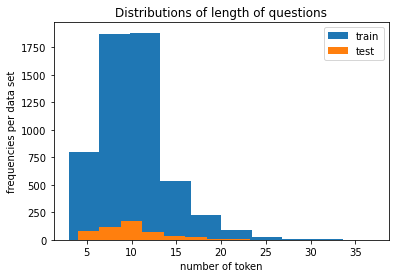

In [35]:
# distribution of length of questions, train and test data
ax1 = plt.hist(train_df['question'].apply(lambda text: len(text.split())),label='train')
ax2 = plt.hist(test_df['question'].apply(lambda text: len(text.split())), label='test')
plt.legend()
plt.xlabel('number of token')
plt.ylabel('frequencies per data set')
plt.title('Distributions of length of questions')
plt.savefig(path_plot + 'length_questions.png')
plt.show()

In [36]:
#average length of question
al_train = round(train_df['question'].apply(lambda text: len(text.split())).mean())
al_test = round(test_df['question'].apply(lambda text: len(text.split())).mean())
print(f'The questions in the train data set have an average of {al_train} tokens,\
 and {al_test} tokens in the test data set.')

The questions in the train data set have an average of 10 tokens, and 10 tokens in the test data set.


In [37]:
#one token per cell --- from question
train_question_df = train_df['question'].str.split(" ", expand=True)
test_question_df = test_df['question'].str.split(" ", expand=True)

# print test, train shape
print(f'---shapes---\ntrain_df:\t{train_df.shape}\
\ntrain_question:\t{train_question_df.shape}\n\
test_question:\t{test_question_df.shape}')

train_question_df 

---shapes---
train_df:	(5452, 4)
train_question:	(5452, 37)
test_question:	(500, 28)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,How,did,serfdom,develop,in,and,then,leave,Russia,?,...,None,None,None,None,None,None,None,None,None,None
1,What,films,featured,the,character,Popeye,Doyle,?,None,None,...,None,None,None,None,None,None,None,None,None,None
2,How,can,I,find,a,list,of,celebrities,',real,...,None,None,None,None,None,None,None,None,None,None
3,What,fowl,grabs,the,spotlight,after,the,Chinese,Year,of,...,None,None,None,None,None,None,None,None,None,None
4,What,is,the,full,form,of,.com,?,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,What,'s,the,shape,of,a,camel,'s,spine,?,...,None,None,None,None,None,None,None,None,None,None
5448,What,type,of,currency,is,used,in,China,?,None,...,None,None,None,None,None,None,None,None,None,None
5449,What,is,the,temperature,today,?,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5450,What,is,the,temperature,for,cooking,?,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [38]:
#percentage distribution of tokens (train)
for column in train_question_df.columns:
    nan_sum = train_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(train_question_df)),2))

0 :  100.0
1 :  100.0
2 :  100.0
3 :  99.93
4 :  97.45
5 :  92.53
6 :  85.29
7 :  74.91
8 :  63.35
9 :  50.99
10 :  40.24
11 :  30.5
12 :  21.88
13 :  16.45
14 :  12.84
15 :  9.3
16 :  6.68
17 :  4.99
18 :  3.52
19 :  2.46
20 :  1.89
21 :  1.32
22 :  0.97
23 :  0.77
24 :  0.53
25 :  0.39
26 :  0.29
27 :  0.28
28 :  0.22
29 :  0.15
30 :  0.13
31 :  0.07
32 :  0.04
33 :  0.04
34 :  0.02
35 :  0.02
36 :  0.02


In [39]:
#percentage distribution of tokens (test)
for column in test_question_df.columns:
    nan_sum = test_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(test_question_df)),2))

0 :  100.0
1 :  100.0
2 :  100.0
3 :  100.0
4 :  97.2
5 :  92.2
6 :  84.0
7 :  73.4
8 :  61.2
9 :  48.0
10 :  36.6
11 :  26.2
12 :  18.6
13 :  12.2
14 :  9.0
15 :  6.0
16 :  4.6
17 :  3.2
18 :  1.6
19 :  1.2
20 :  1.0
21 :  0.8
22 :  0.6
23 :  0.4
24 :  0.4
25 :  0.4
26 :  0.2
27 :  0.2


In [40]:
#distribution of most frequent first words in questions - top 15
question_top_words = train_question_df[0].value_counts().nlargest(15)
question_top_words

What      3242
How        764
Who        559
Where      273
When       131
Which      105
Why        103
Name        90
In          66
The         18
Whose       14
On          13
CNN          5
Define       4
Whom         4
Name: 0, dtype: int64

In [41]:
question_words = list(train_question_df[0].value_counts().nlargest(15).index[0:6])
question_words  #top 7 from above

['What', 'How', 'Who', 'Where', 'When', 'Which']

In [42]:
#combination of words table with (sub)categories

In [43]:
train_df_words = train_df.join(train_question_df)

In [44]:
train_df_words_top = train_df_words.loc[train_df_words[0].isin(question_words)]

In [45]:
#More than 90% of the question texts start with one of 7 (top) question words
train_df_words_top.shape

(5074, 41)

In [46]:
#question words give indications for category
train_df_words_top[0].groupby(train_df_words_top['category']).value_counts()

category  0    
ABBR      What       81
          When        1
DESC      What      749
          How       278
          Where      14
ENTY      What     1112
          Which      43
          How         7
          Where       2
          Who         2
          When        1
HUM       Who       557
          What      533
          Which      46
          When        4
LOC       What      523
          Where     255
          Which      16
          When        1
NUM       How       479
          What      244
          When      124
          Where       2
Name: 0, dtype: int64

In [47]:
#distribution of most frequent first words in questions - top 15
question_top_words = train_question_df[0].value_counts().nlargest(15)
question_top_words

What      3242
How        764
Who        559
Where      273
When       131
Which      105
Why        103
Name        90
In          66
The         18
Whose       14
On          13
CNN          5
Define       4
Whom         4
Name: 0, dtype: int64

In [48]:
question_words = list(train_question_df[0].value_counts().nlargest(15).index[0:6])
question_words  #top 7 from above

['What', 'How', 'Who', 'Where', 'When', 'Which']

combination of words table with (sub)categories

In [49]:
train_df_words = train_df.join(train_question_df)

In [50]:
train_df_words_top = train_df_words.loc[train_df_words[0].isin(question_words)]

In [51]:
#More than 90% of the question texts start with one of 7 (top) question words
train_df_words_top.shape

(5074, 41)

In [52]:
#question words give indications for category
train_df_words_top[0].groupby(train_df_words_top['category']).value_counts()

category  0    
ABBR      What       81
          When        1
DESC      What      749
          How       278
          Where      14
ENTY      What     1112
          Which      43
          How         7
          Where       2
          Who         2
          When        1
HUM       Who       557
          What      533
          Which      46
          When        4
LOC       What      523
          Where     255
          Which      16
          When        1
NUM       How       479
          What      244
          When      124
          Where       2
Name: 0, dtype: int64

train_df_words_top   only used for eda

In [53]:
pd.DataFrame(train_df_words_top[0].groupby(train_df_words_top['category']).value_counts())

0
category 0          
ABBR     What     81
         When      1
DESC     What    749
         How     278
         Where    14
ENTY     What   1112
         Which    43
         How       7
         Where     2
         Who       2
         When      1
HUM      Who     557
         What    533
         Which    46
         When      4
LOC      What    523
         Where   255
         Which    16
         When      1
NUM      How     479
         What    244
         When    124
         Where     2

## Duplicates 

In [54]:
#find duplicates in the raw text (category, subcategory and question)  ==> 100%match
    
find_duplicates(train_df, 'raw')  


{False, True}
The column has 70 duplicates.


In [55]:
#check test_df
find_duplicates(test_df, 'raw')  

{False}
The column has 0 duplicates.


In [56]:
#first value=> false, secound values =>true
dupl_first = list(train_df['raw'].duplicated())
print(list([index for index, value in enumerate(list(dupl_first)) if value == True]),'\n\n')

#first value=> true, secound values =>false
dupl_last = list(train_df['raw'].duplicated(keep='last'))
print(list([index for index, value in enumerate(list(dupl_last)) if value == True]))

[369, 464, 727, 741, 1075, 1361, 1390, 1535, 1596, 1726, 1803, 1886, 1989, 2003, 2490, 2576, 2642, 2851, 2884, 2907, 2971, 2990, 2994, 3258, 3432, 3442, 3448, 3506, 3669, 3724, 3814, 3853, 3860, 3920, 4084, 4152, 4177, 4217, 4266, 4270, 4311, 4326, 4332, 4399, 4411, 4488, 4493, 4524, 4542, 4579, 4622, 4661, 4726, 4734, 4848, 4850, 4883, 4954, 4987, 5057, 5183, 5197, 5207, 5219, 5235, 5271, 5276, 5335, 5358, 5378] 


[121, 123, 244, 313, 325, 347, 351, 369, 457, 474, 493, 504, 511, 546, 587, 608, 659, 665, 713, 732, 834, 886, 894, 976, 979, 1009, 1075, 1087, 1131, 1198, 1230, 1378, 1389, 1497, 1535, 1571, 1658, 1722, 1728, 1792, 1835, 1837, 1923, 1960, 1996, 2003, 2059, 2134, 2380, 2451, 2897, 2913, 2931, 3053, 3333, 3417, 3428, 3432, 3625, 3766, 3981, 4073, 4252, 4311, 4326, 4431, 5075, 5187, 5209, 5235]


In [57]:
#sample (manueal) duplicates
train_df['raw'].loc[369]
train_df.loc[train_df['raw']=='NUM:speed What is the speed of the Mississippi River ?']

,raw,category,subcategory,question
351,NUM:speed What is the speed of the Mississippi...,NUM,speed,What is the speed of the Mississippi River ?
369,NUM:speed What is the speed of the Mississippi...,NUM,speed,What is the speed of the Mississippi River ?
464,NUM:speed What is the speed of the Mississippi...,NUM,speed,What is the speed of the Mississippi River ?


In [58]:
train_df['raw'].loc[5219]
train_df.loc[train_df['raw']=='HUM:ind What Pope inaugurated Vatican International Radio ?']

,raw,category,subcategory,question
5209,HUM:ind What Pope inaugurated Vatican Internat...,HUM,ind,What Pope inaugurated Vatican International Ra...
5219,HUM:ind What Pope inaugurated Vatican Internat...,HUM,ind,What Pope inaugurated Vatican International Ra...


In [59]:
#remove duplicates
clean_duplicates(train_df)

train_df_dropdup = train_df.drop_duplicates()
print(f'shape:\ntrain_df:\t\t{train_df.shape}\ntrain_df_droped:\t{train_df_dropdup.shape}')

shape:
train_df:		(5382, 4)
train_df_droped:	(5382, 4)


# Shrinkage of questions to shorter text


## nltk

In [60]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# default setting for lemmatizer and stopwords
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# remove stop words
nltk.download('stopwords')
my_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /home/an/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/an/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
train_df.head(2)

,raw,category,subcategory,question
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?


In [62]:
# default setting for lemmatizer and stopwords
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# remove stop words
nltk.download('stopwords')
my_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /home/an/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/an/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# corpus from df_train['question'] 
corpus = corpus_func(train_df['question'])
print(corpus[:500])

How did serfdom develop in and then leave Russia ?######What films featured the character Popeye Doyle ?######How can I find a list of celebrities ' real names ?######What fowl grabs the spotlight after the Chinese Year of the Monkey ?######What is the full form of .com ?######What contemptible scoundrel stole the cork from my lunch ?######What team did baseball 's St. Louis Browns become ?######What is the oldest profession ?######What are liver enzymes ?######Name the scar-faced bounty hunter 


In [64]:
#corpus from df_test['question']
corpus_test = corpus_func(test_df['question'])
print(corpus_test[:500])

How did serfdom develop in and then leave Russia ?######What films featured the character Popeye Doyle ?######How can I find a list of celebrities ' real names ?######What fowl grabs the spotlight after the Chinese Year of the Monkey ?######What is the full form of .com ?######What contemptible scoundrel stole the cork from my lunch ?######What team did baseball 's St. Louis Browns become ?######What is the oldest profession ?######What are liver enzymes ?######Name the scar-faced bounty hunter 


## stopwords, clean_text (regex, lowercase)

In [65]:
#check stopwords
stopword_text("why 's Peter's i I you what How Why go 's me how to school")  
#Attention: question words in LOWER case are in stopwords, in UPPER case not !!!

"'s Peter's I How Why go 's school"

In [66]:
# corpus df_train['text'] --> function stopwords
text_corpus = stopword_text(corpus) 
print(text_corpus[:500])


How serfdom develop leave Russia ?######What films featured character Popeye Doyle ?######How I find list celebrities ' real names ?######What fowl grabs spotlight Chinese Year Monkey ?######What full form .com ?######What contemptible scoundrel stole cork lunch ?######What team baseball 's St. Louis Browns become ?######What oldest profession ?######What liver enzymes ?######Name scar-faced bounty hunter The Old West .######When Ozzy Osbourne born ?######Why heavier objects travel downhill fast


In [67]:
#df_test['text']
text_corpus_test = stopword_text(corpus_test)
text_corpus_test[:100]

'How serfdom develop leave Russia ?######What films featured character Popeye Doyle ?######How I find'

In [68]:
#text column generated from question deleting stopwords
train_df['text'] = text_corpus.split('######')      
train_df.head(2)


,raw,category,subcategory,question,text
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...,How serfdom develop leave Russia ?
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?,What films featured character Popeye Doyle ?


In [69]:
print(test_df.shape)
test_df.head(2)

(500, 4)


,raw,category,subcategory,question
0,NUM:dist How far is it from Denver to Aspen ?,DESC,manner,How did serfdom develop in and then leave Russ...
1,"LOC:city What county is Modesto , California in ?",ENTY,cremat,What films featured the character Popeye Doyle ?


In [70]:
test_df['text'] = text_corpus_test.split('######') 

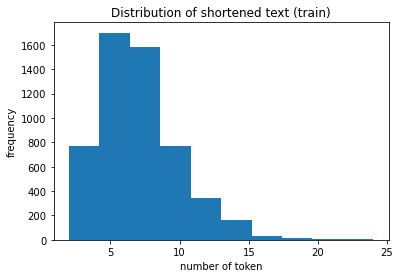

The texts have a mean length of 7 tokens.
The longest text has 24 tokens, the shortest has 2 tokens.


In [71]:
# distribution of length of questions, after stopword-function
df = train_df['text']
title = 'Distribution of shortened text (train)'
diagram ='length_stop_train'

get_plot_length_text(df, title, diagram)

In [72]:
train_text_df = train_df['text'].str.split(" ", expand=True)
train_text_df

test_text_df = test_df['text'].str.split(" ", expand=True)

In [73]:
#percentage distribution of tokens (train)
for column in train_text_df.columns:
    nan_sum = train_text_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(train_text_df)),2))

0 :  100.0
1 :  100.0
2 :  99.96
3 :  96.79
4 :  85.73
5 :  70.51
6 :  54.14
7 :  37.01
8 :  24.73
9 :  16.15
10 :  10.48
11 :  6.95
12 :  4.09
13 :  2.81
14 :  1.78
15 :  1.13
16 :  0.67
17 :  0.54
18 :  0.39
19 :  0.26
20 :  0.19
21 :  0.09
22 :  0.09
23 :  0.02


In [74]:
set(train_text_df[16])

{"''",
 ',',
 '.',
 '111',
 '158',
 '1989',
 '?',
 'American',
 'Computer',
 'DT',
 'Diego',
 'Night',
 None,
 'Sidney',
 'Strikes',
 'The',
 'You',
 'beautiful',
 'body',
 'bugs',
 'forerunner',
 'god-sullen',
 'named',
 'race',
 'sauce',
 'telegraph',
 'voyage'}

## clean_function

In [75]:
# corpus df_train['text'] --> function clean_text
clean_corpus = clean_text(text_corpus)
print(clean_corpus[:500])

clean_corpus_test = clean_text(text_corpus_test)

how serfdom develop leave russia ######what films featured character popeye doyle ######how i find list celebrities ' real names ######what fowl grabs spotlight chinese year monkey ######what full form .com ######what contemptible scoundrel stole cork lunch ######what team baseball st. louis browns become ######what oldest profession ######what liver enzymes ######name scar faced bounty hunter the old west .######when ozzy osbourne born ######why heavier objects travel downhill faster ######who 


In [76]:
#text column generated from question deleting stopwords
train_df['text_clean'] = clean_corpus.split('######')      
train_df.head(2)

test_df['text_clean'] = clean_corpus_test.split('######') 

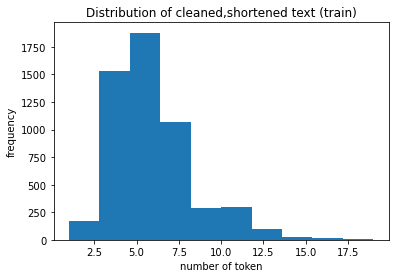

The texts have a mean length of 6 tokens.
The longest text has 19 tokens, the shortest has 1 tokens.


In [77]:
# distribution of length of questions, after clean_function
df = train_df['text_clean']
title = 'Distribution of cleaned,shortened text (train)'
diagram ='length_clean_train'

get_plot_length_text(df, title, diagram)

In [78]:
#train data
#one token per cell --- from text_clean
train_text_clean_df = train_df['text_clean'].str.split(" ", expand=True)
#test_text_clean_df = test_df['question'].str.split(" ", expand=True)

# print test, train shape
print(f'---shapes---\ntrain_df:\t\t{train_df.shape}\
\ntrain_text_clean:\t{train_text_clean_df.shape}')

train_text_clean_df 

---shapes---
train_df:		(5382, 6)
train_text_clean:	(5382, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,how,serfdom,develop,leave,russia,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,what,films,featured,character,popeye,doyle,,None,None,None,None,None,None,None,None,None,None,None,None,None
2,how,i,find,list,celebrities,',real,names,,None,None,None,None,None,None,None,None,None,None,None
3,what,fowl,grabs,spotlight,chinese,year,monkey,,None,None,None,None,None,None,None,None,None,None,None,None
4,what,full,form,.com,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,what,shape,camel,spine,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5448,what,type,currency,used,china,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5449,what,temperature,today,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5450,what,temperature,cooking,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [79]:
train_final_df = train_df.join(train_text_clean_df)
train_final_df.shape

(5382, 26)

In [80]:
train_final_df.drop_duplicates(inplace=True)
train_final_df.head()

,raw,category,subcategory,question,text,text_clean,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...,How serfdom develop leave Russia ?,how serfdom develop leave russia,how,serfdom,develop,leave,...,None,None,None,None,None,None,None,None,None,None
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?,What films featured character Popeye Doyle ?,what films featured character popeye doyle,what,films,featured,character,...,None,None,None,None,None,None,None,None,None,None
2,DESC:manner How can I find a list of celebriti...,DESC,manner,How can I find a list of celebrities ' real na...,How I find list celebrities ' real names ?,how i find list celebrities ' real names,how,i,find,list,...,None,None,None,None,None,None,None,None,None,None
3,ENTY:animal What fowl grabs the spotlight afte...,ENTY,animal,What fowl grabs the spotlight after the Chines...,What fowl grabs spotlight Chinese Year Monkey ?,what fowl grabs spotlight chinese year monkey,what,fowl,grabs,spotlight,...,None,None,None,None,None,None,None,None,None,None
4,ABBR:exp What is the full form of .com ?,ABBR,exp,What is the full form of .com ?,What full form .com ?,what full form .com,what,full,form,.com,...,None,None,None,None,None,None,None,None,None,None


In [81]:
train_final_df.shape

(5382, 26)

In [82]:
#test data
#one token per cell --- from text_clean
test_text_clean_df = test_df['text_clean'].str.split(" ", expand=True)

# print test, train shape
print(f'---shapes---\ntest_df:\t\t{test_df.shape}\
\ntest_text_clean:\t{test_text_clean_df.shape}')

test_text_clean_df 

---shapes---
test_df:		(500, 6)
test_text_clean:	(500, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,how,serfdom,develop,leave,russia,,None,None,None,None,None,None,None,None,None,None,None
1,what,films,featured,character,popeye,doyle,,None,None,None,None,None,None,None,None,None,None
2,how,i,find,list,celebrities,',real,names,,None,None,None,None,None,None,None,None
3,what,fowl,grabs,spotlight,chinese,year,monkey,,None,None,None,None,None,None,None,None,None
4,what,full,form,.com,,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,what,jewish,bible,called,,None,None,None,None,None,None,None,None,None,None,None,None
496,why,grass,green,,None,None,None,None,None,None,None,None,None,None,None,None,None
497,what,firewall,,None,None,None,None,None,None,None,None,None,None,None,None,None,None
498,what,spy,novelist,served,moscow,correspondent,reuter,the,times,london,,None,None,None,None,None,None


In [83]:
test_final_df = test_df.join(test_text_clean_df)
test_final_df.shape

(500, 23)

In [84]:
test_final_df = test_df.join(test_text_clean_df)
print(test_final_df.shape)
test_final_df.head()


(500, 23)


,raw,category,subcategory,question,text,text_clean,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,NUM:dist How far is it from Denver to Aspen ?,DESC,manner,How did serfdom develop in and then leave Russ...,How serfdom develop leave Russia ?,how serfdom develop leave russia,how,serfdom,develop,leave,...,None,None,None,None,None,None,None,None,None,None
1,"LOC:city What county is Modesto , California in ?",ENTY,cremat,What films featured the character Popeye Doyle ?,What films featured character Popeye Doyle ?,what films featured character popeye doyle,what,films,featured,character,...,None,None,None,None,None,None,None,None,None,None
2,HUM:desc Who was Galileo ?,DESC,manner,How can I find a list of celebrities ' real na...,How I find list celebrities ' real names ?,how i find list celebrities ' real names,how,i,find,list,...,names,,None,None,None,None,None,None,None,None
3,DESC:def What is an atom ?,ENTY,animal,What fowl grabs the spotlight after the Chines...,What fowl grabs spotlight Chinese Year Monkey ?,what fowl grabs spotlight chinese year monkey,what,fowl,grabs,spotlight,...,,None,None,None,None,None,None,None,None,None
4,NUM:date When did Hawaii become a state ?,ABBR,exp,What is the full form of .com ?,What full form .com ?,what full form .com,what,full,form,.com,...,None,None,None,None,None,None,None,None,None,None


again for test data

In [85]:
#test_question_df = test_df['question'].str.split(" ", expand=True)   tbd. to be cleaned with stopwords
#test_question_df

In [86]:
# corpus df_test['text'] --> function stopwords
text_corpus_test = stopword_text(corpus_test) 
print(text_corpus_test[:500])

How serfdom develop leave Russia ?######What films featured character Popeye Doyle ?######How I find list celebrities ' real names ?######What fowl grabs spotlight Chinese Year Monkey ?######What full form .com ?######What contemptible scoundrel stole cork lunch ?######What team baseball 's St. Louis Browns become ?######What oldest profession ?######What liver enzymes ?######Name scar-faced bounty hunter The Old West .######When Ozzy Osbourne born ?######Why heavier objects travel downhill fast


In [87]:
# corpus df_train['text'] --> function clean_text
clean_corpus_test = clean_text(text_corpus_test)
print(clean_corpus_test[:500])


how serfdom develop leave russia ######what films featured character popeye doyle ######how i find list celebrities ' real names ######what fowl grabs spotlight chinese year monkey ######what full form .com ######what contemptible scoundrel stole cork lunch ######what team baseball st. louis browns become ######what oldest profession ######what liver enzymes ######name scar faced bounty hunter the old west .######when ozzy osbourne born ######why heavier objects travel downhill faster ######who 


In [88]:
#text column generated from question deleting stopwords
test_df['text'] = text_corpus_test.split('######')      
test_df.head(2)

,raw,category,subcategory,question,text,text_clean
0,NUM:dist How far is it from Denver to Aspen ?,DESC,manner,How did serfdom develop in and then leave Russ...,How serfdom develop leave Russia ?,how serfdom develop leave russia
1,"LOC:city What county is Modesto , California in ?",ENTY,cremat,What films featured the character Popeye Doyle ?,What films featured character Popeye Doyle ?,what films featured character popeye doyle


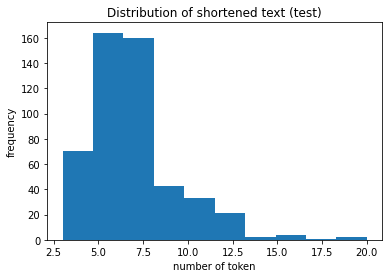

The texts have a mean length of 7 tokens.
The longest text has 20 tokens, the shortest has 3 tokens.


In [89]:
# distribution of length of questions, test_df['text']
df = test_df['text']     # anzupassen
title = 'Distribution of shortened text (test)'
diagram ='length_short_test'

get_plot_length_text(df, title, diagram)

In [90]:
#percentage distribution of tokens (test)
for column in test_question_df.columns:
    nan_sum = test_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(test_question_df)),2))

0 :  100.0
1 :  100.0
2 :  100.0
3 :  100.0
4 :  97.2
5 :  92.2
6 :  84.0
7 :  73.4
8 :  61.2
9 :  48.0
10 :  36.6
11 :  26.2
12 :  18.6
13 :  12.2
14 :  9.0
15 :  6.0
16 :  4.6
17 :  3.2
18 :  1.6
19 :  1.2
20 :  1.0
21 :  0.8
22 :  0.6
23 :  0.4
24 :  0.4
25 :  0.4
26 :  0.2
27 :  0.2
